In [1]:
import numpy as np
import pandas as pd
import os
import re
#https://www.nltk.org/
from sklearn.feature_extraction.text import CountVectorizer
#import tensorflow as tf
import ast
from matplotlib import pyplot as plt

#Decision trees for regression
#MSE for loss function

In [2]:
# from keybert import KeyBERT
# kw_model = KeyBERT()

In [3]:
#Extract the dataset we are interested in, synopsis, name, and rating.
df = pd.read_csv('DataSet/animes.csv')
df = df[['title','synopsis','score']]
df.dropna(inplace=True)
df = df[~df.title.duplicated(keep='first')]
df.head()

,title,synopsis,score
0,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,8.82
1,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,8.83
2,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,8.83
3,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",9.23
4,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,8.83


In [4]:
#Method one for generating X vectors: hash.
from sklearn.feature_extraction.text import HashingVectorizer
X = df['synopsis'].to_numpy()
y = df['score'].to_numpy()
y = np.rint(y)
print(len(y))
vectorizer = HashingVectorizer(n_features=100, norm = None, alternate_sign = False)
hashed_X = vectorizer.fit_transform(X)
#print(hashed_X)
hashed_X.shape

15192


(15192, 100)

In [6]:
#Building training sets and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hashed_X, y, test_size = 0.2)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(max_depth=100)
model.fit(X_train, y_train)
pred = model.predict(X_test)

score = accuracy_score(y_test, pred)
print("Score: " + str(score))

Score: 0.36031589338598224


Accuracy of about 35%, which is better than guessing randomly (10%), but not very good for practical predictions.

Pros of this method: Easy to implement

Cons: Not interpretable, I have no idea what type of synopsis correspond to the predictions made.

In [8]:
import nltk

#https://www.nltk.org/book/ch06.html
#https://www.datacamp.com/tutorial/text-analytics-beginners-nltk#sentiment-analysis

In [9]:
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['synopsis'])

In [10]:
#https://splunktool.com/unknown-label-type-error-when-sklearn-naive-bayes-used-with-floating-point-numbers
score_int = df['score'].to_numpy()
score_int = np.rint(score_int)
X_train, X_test, y_train, y_test = train_test_split(text_counts, score_int, test_size=0.3, random_state=1)

In [11]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))


Accuracy: 0.48244844229925404


The accuracy is slightly higher with nltk implemented at around 47%, but there are still improvements to be made. 

In [12]:
from sklearn.tree import DecisionTreeRegressor

#Using old tokenizer, subject to change.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])

#Now that we are using decision tree regression, we can use the scores as floats.
y = df['score'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

In [13]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))


1.0078998980745089
0.0027221966491129085


It seems this initial run on regression tree overfit the data, it has a really low mean squared error on the training data, but seems to be relatively high on the testing data

In [14]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#with stop words & max_df 0.7 & ngram_range = (1,2)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,2), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

0.9804599953881453
0.002713765829728543


In [15]:
#without stop words & ngram_range = (1,1)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, ngram_range = (1,1), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

1.038855534690227
0.002550271377970033


In [16]:
#without stop words & ngram_range = (1,2)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, ngram_range = (1,2), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

1.025793894765309
0.002550271377970033


The removal of stop words helps get a better score. Changing the ngram to unigrams and bigrams also helps.

In [17]:
#with stop words & max_df 0.7 & ngram_range = (1,2)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,2), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

0.9626366662476842
0.002713765829728543


In [18]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#with stop words & nmax_df 0.7 & gram_range = (1,2)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,3), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

0.9442686759010408
0.002713765829728543


ngram of (1,3) has a slightly better score. However we will just stick with (1,2) since (1,3) takes too long to process

In [19]:
#with stop words & max_df 0.7 & ngram_range = (1,2)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,2), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg = DecisionTreeRegressor(max_depth=30)
tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

0.7896115449882086
0.3870550989479334


Limiting Tree depth significantly improves accuracy on the test data, let's try to find optimal depth.

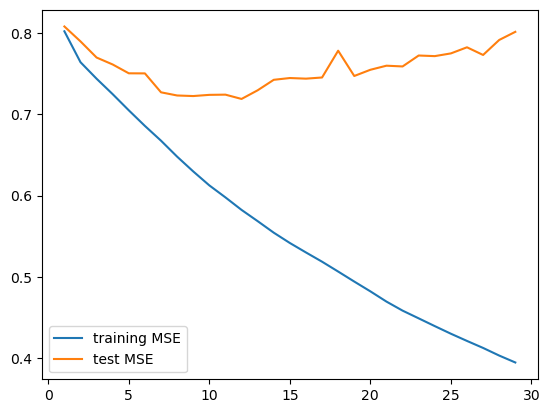

In [20]:
depth = []
training_MSE= []
test_MSE = []
for i in range(30):
    if(i == 0):
        pass
    else:
        #with stop words & max_df 0.7 & ngram_range = (1,2)
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,2), tokenizer = token.tokenize)
        X= cv.fit_transform(df['synopsis'])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

        tree_reg = DecisionTreeRegressor(max_depth=i)
        tree_reg.fit(X_train, y_train)

        y_test_pred = tree_reg.predict(X_test)

        y_train_pred = tree_reg.predict(X_train)
        
        training_MSE.append(mean_squared_error(y_train, y_train_pred))
        test_MSE.append(mean_squared_error(y_test, y_test_pred))
        depth.append(i)
plt.plot(depth, training_MSE, label = "training MSE")
plt.plot(depth, test_MSE, label = "test MSE")
plt.legend()
plt.show()

In [14]:
#https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e
#https://kavita-ganesan.com/how-to-use-countvectorizer/#.Y4p3VXbMKUk
#https://investigate.ai/text-analysis/counting-words-with-scikit-learns-countvectorizer/
#https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c
df_high = df.loc[df['score'] >= 9]
df_high.head()

,title,synopsis,score
3,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",9.23
765,Koe no Katachi,"As a wild youth, elementary school student Sho...",9.01
766,3-gatsu no Lion 2nd Season,"Now in his second year of high school, Rei Kir...",9.02
767,Ginga Eiyuu Densetsu,The 150-year-long stalemate between the two in...,9.03
768,Gintama',"After a one-year hiatus, Shinpachi Shimura ret...",9.04


In [20]:
cv = CountVectorizer(lowercase=True, stop_words='english', max_df = 0.7)
X= cv.fit_transform(df_high['synopsis'])
cv.vocabulary_

{'order': 399,
 'obtained': 392,
 'equal': 181,
 'value': 632,
 'lost': 336,
 'alchemy': 24,
 'bound': 70,
 'law': 315,
 'equivalent': 182,
 'exchange': 187,
 'young': 658,
 'brothers': 75,
 'edward': 167,
 'alphonse': 31,
 'elric': 169,
 'realize': 460,
 'attempting': 48,
 'human': 271,
 'transmutation': 616,
 'forbidden': 209,
 'act': 7,
 'pay': 414,
 'terrible': 594,
 'price': 441,
 'transgression': 615,
 'loses': 335,
 'left': 320,
 'leg': 321,
 'physical': 424,
 'body': 67,
 'desperate': 143,
 'sacrifice': 496,
 'right': 490,
 'arm': 42,
 'able': 3,
 'affix': 14,
 'soul': 548,
 'suit': 576,
 'armor': 44,
 'devastated': 146,
 'hope': 268,
 'eventually': 184,
 'return': 484,
 'original': 401,
 'bodies': 66,
 'gives': 235,
 'inspiration': 286,
 'obtain': 391,
 'metal': 356,
 'limbs': 326,
 'called': 82,
 'automail': 51,
 'state': 561,
 'alchemist': 23,
 'fullmetal': 218,
 'years': 656,
 'searching': 505,
 'later': 314,
 'seek': 509,
 'philosopher': 422,
 'stone': 563,
 'mythical': 37

In [21]:
high_arr = X.toarray()
df = pd.DataFrame(data=high_arr ,columns = cv.get_feature_names_out())
print(df)

    150  5pb  abandoned  able  absence  acclaimed  achieving  act  action  \
0     0    0          0     1        0          0          0    1       0   
1     0    0          0     0        0          0          0    0       0   
2     0    0          0     0        0          0          0    0       0   
3     1    0          0     0        0          0          0    0       0   
4     0    0          0     0        0          0          0    0       0   
5     0    0          0     0        0          0          0    0       0   
6     0    0          0     0        1          0          0    0       0   
7     0    0          0     0        0          0          0    0       0   
8     0    0          1     0        0          0          1    0       0   
9     0    1          0     0        0          1          0    0       1   
10    0    0          0     0        0          0          0    0       0   

    actions  ...  world  wrongdoings  yang  yeager  year  yearns  years  \


In [38]:
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,2), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
y = df['score'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg = DecisionTreeRegressor(max_depth=10)
tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)


print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))
print(y_test_pred)

#print(cv.inverse_transform(X))

0.6125179169063656
0.7237100350140014
[6.6295     6.22719265 7.49352941 ... 6.22719265 6.1628     5.85474308]


In [27]:
def predict_single_desc(desc):
    anime_desc = [desc]
    vec = cv.transform(anime_desc)
    pred_score = tree_reg.predict(vec)
    print(pred_score)

In [37]:
predict_single_desc("""Denji is robbed of a normal teenage life, left with nothing but his deadbeat father's overwhelming debt. His only companion is his pet, the chainsaw devil Pochita, with whom he slays devils for money that inevitably ends up in the yakuza's pockets. All Denji can do is dream of a good, simple life: one with delicious food and a beautiful girlfriend by his side. But an act of greedy betrayal by the yakuza leads to Denji's brutal, untimely death, crushing all hope of him ever achieving happiness.

Remarkably, an old contract allows Pochita to merge with the deceased Denji and bestow devil powers on him, changing him into a hybrid able to transform his body parts into chainsaws. Because Denji's new abilities pose a significant risk to society, the Public Safety Bureau's elite devil hunter Makima takes him in, letting him live as long as he obeys her command. Guided by the promise of a content life alongside an attractive woman, Denji devotes everything and fights with all his might to make his naive dreams a reality.""")

[6.6295]


<AxesSubplot:>

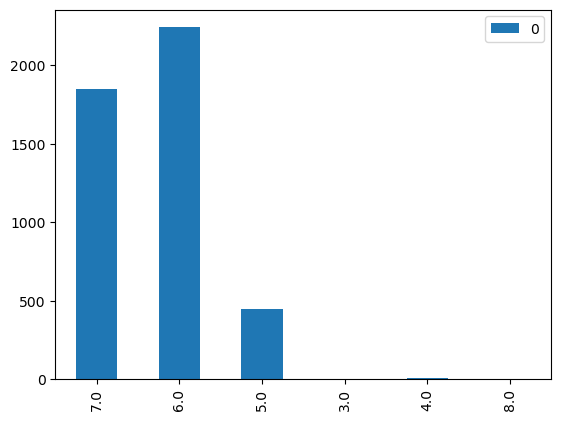

In [43]:
from collections import Counter
import pandas

data = np.rint(y_test_pred)
count = Counter(data)
df = pandas.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')


<AxesSubplot:>

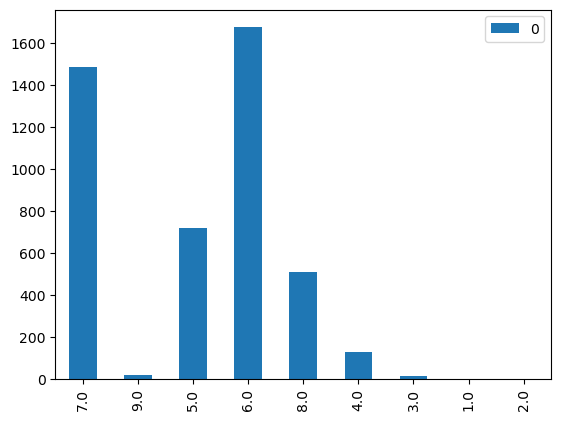

In [41]:
from collections import Counter
import pandas

data = np.rint(y_test)
count = Counter(data)
df = pandas.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')
